In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

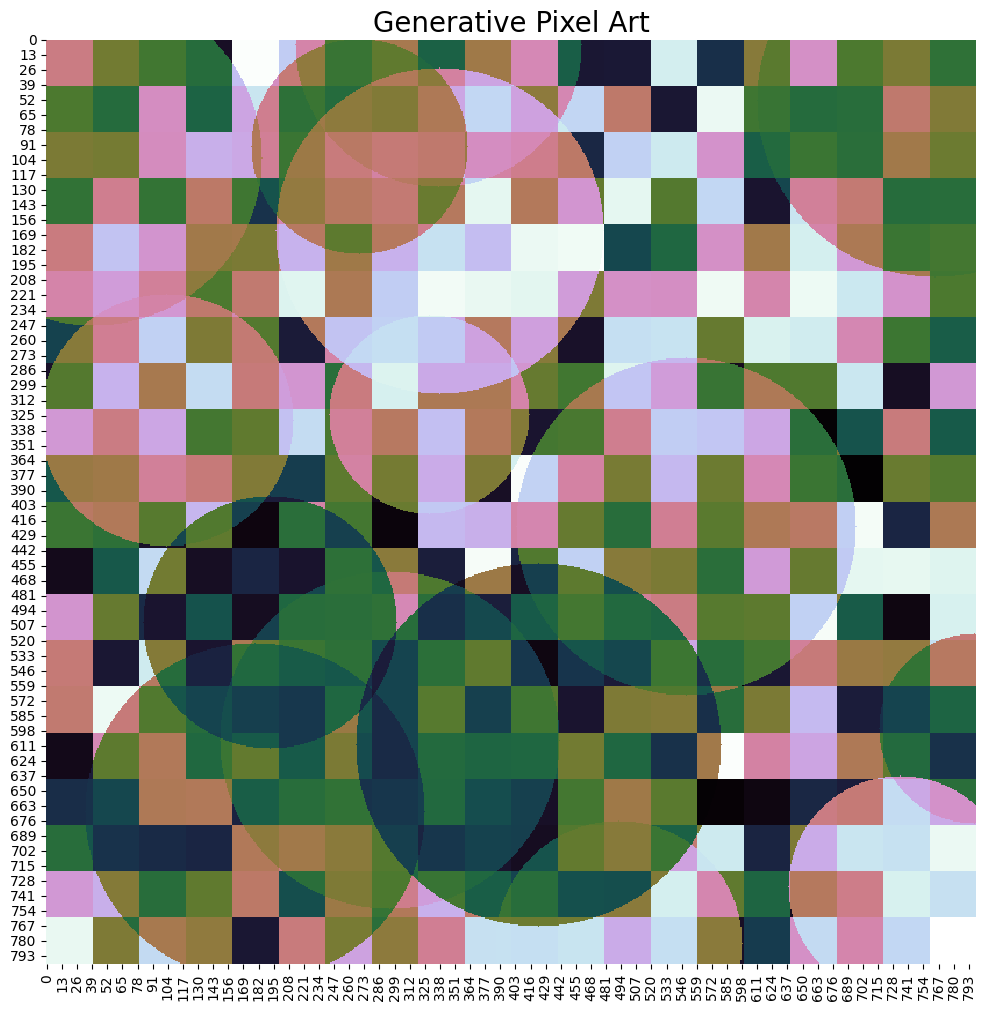

In [ ]:
from scipy.ndimage import gaussian_filter

# --- 1. Setup ---
canvas_size = 800
grid_size = 40  # Increased grid density for more detail
square_size = canvas_size // grid_size
canvas = np.zeros((canvas_size, canvas_size))

# --- 2. Generate Structured Background ---
# Use a mathematical function for a wave-like pattern instead of random colors
for i in range(grid_size):
    for j in range(grid_size):
        # Sine and Cosine waves create a smooth, organic pattern
        color_value = (np.sin(i / grid_size * 4 * np.pi) + np.cos(j / grid_size * 4 * np.pi)) * 5
        
        start_row = i * square_size
        end_row = start_row + square_size
        start_col = j * square_size
        end_col = start_col + square_size
        canvas[start_row:end_row, start_col:end_col] = color_value

# --- 3. Add a Central Mandala/Ripple Overlay ---
cx, cy = canvas_size // 2, canvas_size // 2
y, x = np.ogrid[:canvas_size, :canvas_size]
dist_from_center = np.sqrt((x - cx)**2 + (y - cy)**2)

# Create a ripple effect using a sine wave based on distance from the center
# This creates concentric rings, like a mandala
ripple_effect = np.sin(dist_from_center / (canvas_size * 0.05)) * 10
canvas += ripple_effect

# --- 4. Post-Processing ---
# Apply a Gaussian blur to soften the hard edges and blend the patterns
final_art = gaussian_filter(canvas, sigma=3)

# --- 5. Visualization ---
plt.figure(figsize=(12, 12))
sns.heatmap(final_art, cmap='magma', cbar=False, xticklabels=False, yticklabels=False)
plt.title("Generative Mandala", fontsize=20)
plt.show()